# Importing Libraries:

In [1]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Importing Image Module from PIL Library(Python Imaging Library):

In [2]:
import requests #library for making HTTP requests and retrieve data from the internet.
from PIL import Image
from io import BytesIO #It is used to handle binary data, such as images or any other kind of binary information
import copy #It is used when you want to duplicate an object in memory,

# Importing Libraries for Confusion Matrix:

In [3]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# Setting Batch Size:

In [4]:
numb_batch = 64

# Getting Data:
- We need to transform the image into a tensor that can be used.
- DataLoaders allow you to load your dataset in small batches.
- Setting up data preprocessing and DataLoaders for the MNIST dataset using the PyTorch and torchvision libraries.

In [5]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = numb_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = numb_batch)

100%|██████████| 9912422/9912422 [00:00<00:00, 114192948.43it/s]


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 100194949.40it/s]


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 47015856.18it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 998821.83it/s]


Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



# Creating Model:
- For the Mnist dataset, we will be using the LeNet 5 architecture.
- LeNet-5 was originally designed for handwritten digit recognition tasks, which makes it particularly suitable for the MNIST dataset.
- ***nn.Conv2d(1, 6, 5, padding=2):*** This is a 2D convolutional layer with the following parameters:

      -> 1 input channel (because MNIST images are grayscale).
      -> 6 output channels (the number of feature maps).
      -> 5x5 kernel size.
      -> padding=2 adds zero-padding to the input, so the spatial dimensions remain the same after convolution.

In [6]:
def create_lenet():
    model = nn.Sequential(   #This creates a sequential container for your model, where you can define a sequence of layers to be applied in order.
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model

# Validating the Model:
- The validation function in PyTorch function is used for evaluating a neural network model's performance on a validation dataset.
- ***total*** and ***correct*** are initialized to keep track of the total number of validation samples and the number of correctly predicted samples.
- ***images.cuda():*** This is necessary if the model is on the GPU because you want to perform inference on the same device as the model.
- ***torch.max(x, 1)*** is used to find the index of the maximum value along the second dimension.
- ***pred = pred.data.cpu()*** moves the predicted labels back to the CPU, converting them to CPU tensors.
- Itis evaluating how well a neural network model performs on a validation dataset by checking how many of the model's predictions match the actual labels of the data.

In [7]:
def validate(model, data):
 #data is a DataLoader that provides batches of validation data, including both images and their corresponding labels.
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total

# Training Function:

In [8]:
def train(numb_epoch=3, lr=1e-3, device="cpu"): #device to the cpu of the machine.
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

# Checking Availability of GPU:

In [9]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No Cuda Available")
device

device(type='cuda', index=0)

# Training a Model:

Saving Best Model with Accuracy:  96.12000274658203
Epoch: 1 Accuracy : 96.12000274658203 %
Saving Best Model with Accuracy:  97.66999816894531
Epoch: 2 Accuracy : 97.66999816894531 %
Epoch: 3 Accuracy : 97.33999633789062 %
Saving Best Model with Accuracy:  97.83000183105469
Epoch: 4 Accuracy : 97.83000183105469 %
Saving Best Model with Accuracy:  98.18000030517578
Epoch: 5 Accuracy : 98.18000030517578 %
Saving Best Model with Accuracy:  98.41999816894531
Epoch: 6 Accuracy : 98.41999816894531 %
Saving Best Model with Accuracy:  98.56999969482422
Epoch: 7 Accuracy : 98.56999969482422 %
Epoch: 8 Accuracy : 98.52999877929688 %
Saving Best Model with Accuracy:  98.58000183105469
Epoch: 9 Accuracy : 98.58000183105469 %
Saving Best Model with Accuracy:  98.62000274658203
Epoch: 10 Accuracy : 98.62000274658203 %
Epoch: 11 Accuracy : 98.55999755859375 %
Epoch: 12 Accuracy : 98.37999725341797 %
Epoch: 13 Accuracy : 98.56999969482422 %
Saving Best Model with Accuracy:  98.7699966430664
Epoch: 14

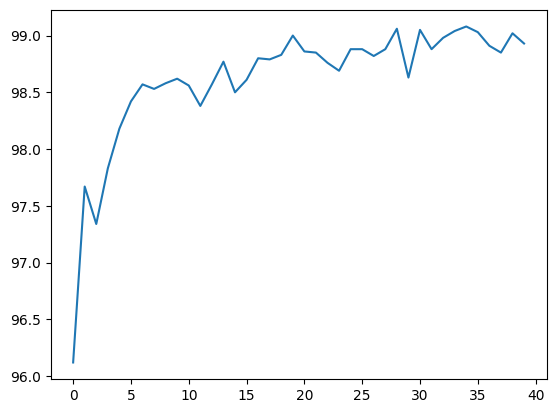

In [10]:
lenet = train(40, device=device)

# Saving The Model:

In [11]:
torch.save(lenet.state_dict(), "lenet.pth")


# Loading The Model(Optional):
- If we donot want to train the model again, so we will load the model.

In [12]:
lenet = create_lenet().to(device)
lenet.load_state_dict(torch.load("lenet.pth"))
lenet.eval()

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

# Test Validation of Data:
- We also want to see where the model got confused. In order to do this, we will have a list of predictions and ground truth for every image in the validation set.



In [13]:
def predict_dl(model, data):
    y_pred = []
    y_true = []
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
    return np.array(y_pred), np.array(y_true)


# Confusion Matrix:
-   Call the function and store it in two numpy arrays that are returned from the predict_dl function.
- We have two numpy arrays of the predictions and the ground truth, we can use the confusion matrix feature from sklearn.

In [14]:
 y_pred, y_true = predict_dl(lenet, val_dl)
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))


,0,1,2,3,4,5,6,7,8,9
0,978,0,0,0,0,0,1,1,0,0
1,0,1134,0,0,0,0,0,0,1,0
2,3,1,1023,1,0,1,0,3,0,0
3,0,0,1,1000,0,6,0,0,2,1
4,0,0,0,0,971,0,5,0,0,6
5,0,1,0,2,0,888,1,0,0,0
6,5,3,0,0,1,2,946,0,1,0
7,0,7,4,0,0,0,0,1013,2,2
8,3,0,1,1,0,1,1,2,962,3
9,0,3,0,0,5,3,1,2,2,993


# Defining Inference Function:
- Inference functions are defined to encapsulate the process of making predictions or inferences.

In [15]:
def inference(path, model, device):
    r = requests.get(path)
    with BytesIO(r.content) as f:
        img = Image.open(f).convert(mode="L")
        img = img.resize((28, 28))
        x = (255 - np.expand_dims(np.array(img), -1))/255.
    with torch.no_grad():
        pred = model(torch.unsqueeze(T(x), axis=0).float().to(device))
        return F.softmax(pred, dim=-1).cpu().numpy()

# Getting Image from the Web:

In [16]:
path = "https://previews.123rf.com/images/aroas/aroas1704/aroas170400068/79321959-handwritten-sketch-black-number-8-on-white-background.jpg"
r = requests.get(path)
with BytesIO(r.content) as f:
    img = Image.open(f).convert(mode="L")
    img = img.resize((28, 28))
x = (255 - np.expand_dims(np.array(img), -1))/255.

# Showing the Image:

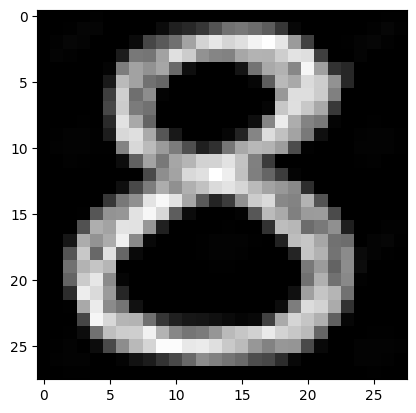

In [17]:
plt.imshow(x.squeeze(-1), cmap="gray")

In [18]:

pred = inference(path, lenet, device=device)
pred_idx = np.argmax(pred)
print(f"Predicted: {pred_idx}, Prob: {pred[0][pred_idx]*100} %")


Predicted: 8, Prob: 99.9926209449768 %


# Checking Model Features:

In [24]:
lenet


Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

# Installing Summary of a Model:

In [25]:
import torch
from torchsummary import summary

In [32]:
model = lenet

# Loading Summary of Model:

In [33]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              ReLU-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------